In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re


In [ ]:
# Load dataset
df = pd.read_excel("/content/Flip + Scrap Combined.xlsx")

df.head()


,rating,text
0,5,Great cooler.. excellent air flow and for this...
1,5,Best budget 2 fit cooler. Nice cooling
2,3,The quality is good but the power of air is de...
3,1,Very bad product it's a only a fan
4,3,Ok ok product


In [ ]:
df.isna().sum()

,0
rating,0
text,2


In [ ]:
# Drop missing values
df.dropna(inplace=True)


In [ ]:
df.isna().sum()

,0
rating,0
text,0


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Handle negations
    text = re.sub(r"\bnot\s+(\w+)", r"not_\1", text)  # E.g., "not great" -> "not_great"
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove extra spaces
    return " ".join(filtered_tokens).strip()

# Apply to DataFrame
df['cleaned_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df['cleaned_text']

,cleaned_text
0,great cooler excellent air flow price amazing ...
1,best budget fit cooler nice cooling
2,quality good power air decent
3,bad product fan
4,ok ok product
...,...
102301,leggins really warm nice wear length short wea...
102302,warm cosy size absolutely spot medium
102303,bought initially wife really feel cold working...
102304,bought xl size uk cant even go past thigh knee...


In [ ]:
# Map sentiments to numbers (e.g., 'positive': 1, 'negative': 0, 'neutral': 2)
df['sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else (0 if x < 3 else 2))

In [ ]:
df

,rating,text,cleaned_text,sentiment
0,5,Great cooler.. excellent air flow and for this...,great cooler excellent air flow price amazing ...,1
1,5,Best budget 2 fit cooler. Nice cooling,best budget fit cooler nice cooling,1
2,3,The quality is good but the power of air is de...,quality good power air decent,2
3,1,Very bad product it's a only a fan,bad product fan,0
4,3,Ok ok product,ok ok product,2
...,...,...,...,...
102301,3,The leggins are really warm and nice to wear. ...,leggins really warm nice wear length short wea...,2
102302,5,Warm cosy and size absolutely spot on for medium,warm cosy size absolutely spot medium,1
102303,5,Bought these initially for my wife who really ...,bought initially wife really feel cold working...,1
102304,1,"I bought these in XL size. I am 16/18 UK, they...",bought xl size uk cant even go past thigh knee...,0


In [ ]:
# prompt: dwnload df dataset

# Assuming df is already defined and preprocessed as in the provided code.
from google.colab import files
df.to_csv('processed_dataframe.csv', encoding = 'utf-8-sig')
files.download('processed_dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.columns

Index(['rating', 'text', 'cleaned_text', 'sentiment'], dtype='object')

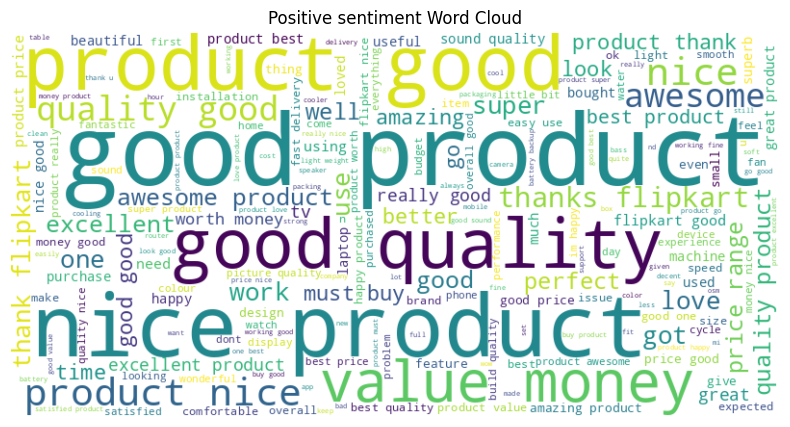

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'df' dfFrame is already created and preprocessed as in the provided code

# Function to generate and display word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Separate text for each sentiment
# Use numerical values (1, 0, 2) instead of strings for sentiment filtering
positive_text = " ".join(review for review in df[df['sentiment'] == 1]['cleaned_text'])
negative_text = " ".join(review for review in df[df['sentiment'] == 0]['cleaned_text'])
neutral_text = " ".join(review for review in df[df['sentiment'] == 2]['cleaned_text'])

# Generate and plot word clouds
plot_wordcloud(positive_text, "Positive sentiment Word Cloud")

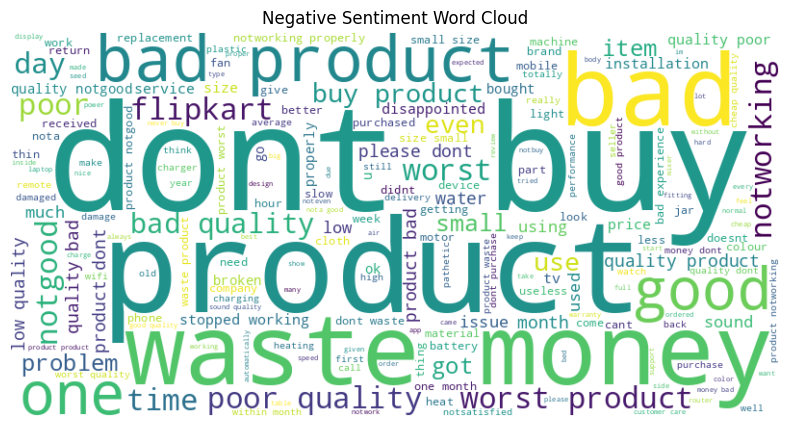

In [ ]:
plot_wordcloud(negative_text, "Negative Sentiment Word Cloud")


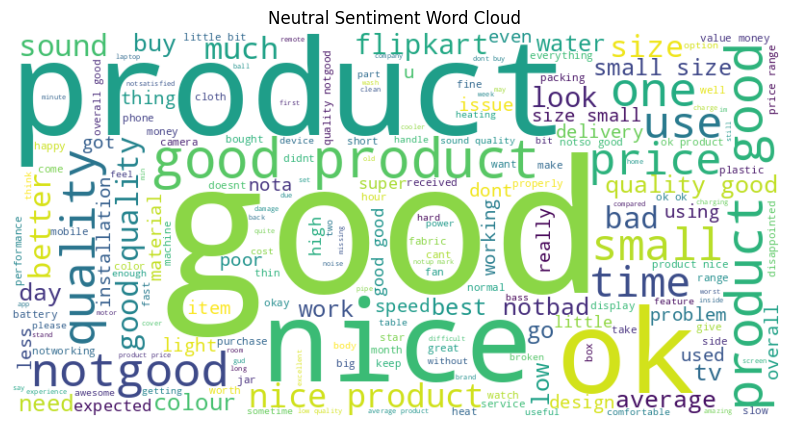

In [ ]:
plot_wordcloud(neutral_text, "Neutral Sentiment Word Cloud")

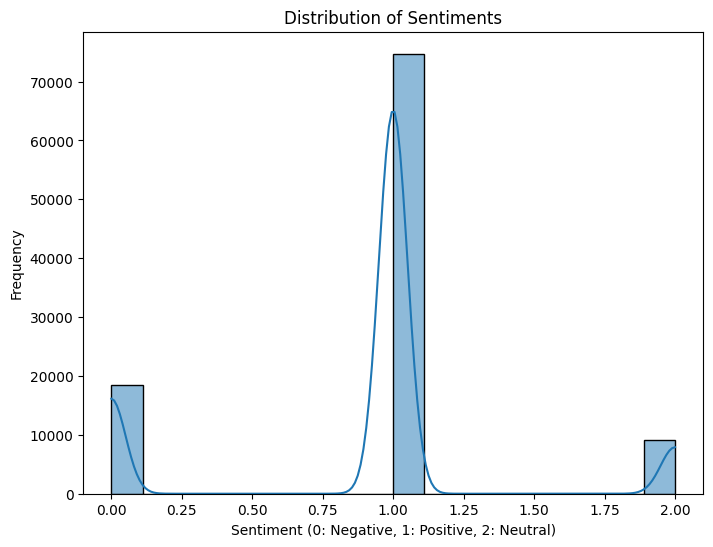

In [ ]:
# prompt: histplot of sentiment

# Assuming 'df' and 'sentiment' column are already defined as in the previous code

plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], kde=True)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment (0: Negative, 1: Positive, 2: Neutral)')
plt.ylabel('Frequency')
plt.show()

In [ ]:

# Features and labels
X = df['cleaned_text']
y = df['sentiment']


In [ ]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


In [ ]:
print(df['sentiment'].value_counts())


sentiment
1    74733
0    18514
2     9057
Name: count, dtype: int64


In [ ]:
# Resample the df to balance the classes (optional but recommended for imbalanced dfsets)
from sklearn.utils import resample

# Separate majority and minority classes
# Use numerical values to filter sentiments consistently
negative_reviews = df[df['sentiment'] == 0]  # Sentiment 0 for negative
positive_reviews = df[df['sentiment'] == 1]  # Sentiment 1 for positive
neutral_reviews = df[df['sentiment'] == 2]  # Sentiment 2 for neutral

# Upsample minority classes
# Check if positive_reviews is empty to avoid the error
if len(positive_reviews) > 0:
    negative_upsampled = resample(negative_reviews, replace=True, n_samples=len(positive_reviews), random_state=42)
    neutral_upsampled = resample(neutral_reviews, replace=True, n_samples=len(positive_reviews), random_state=42)

    # Combine upsampled minority classes with the majority class
    df = pd.concat([positive_reviews, negative_upsampled, neutral_upsampled])
else:
    print("No positive reviews found for upsampling.")

# Check the class distribution after upsampling
print(df['sentiment'].value_counts())

sentiment
1    74733
0    74733
2    74733
Name: count, dtype: int64


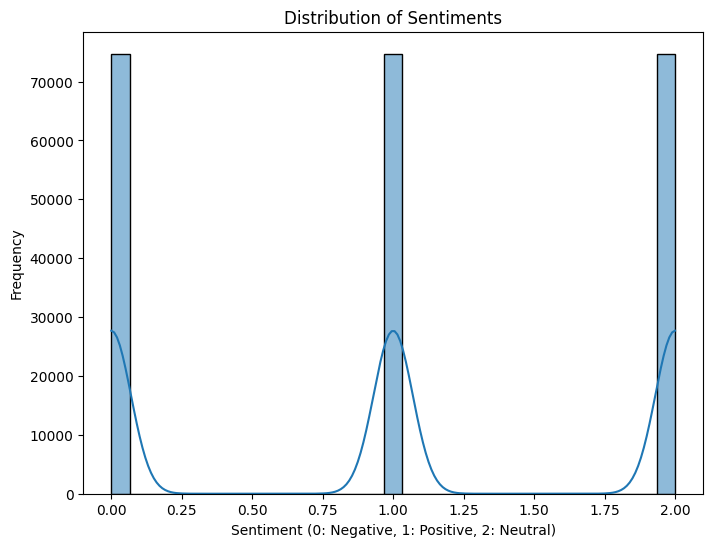

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], kde=True)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment (0: Negative, 1: Positive, 2: Neutral)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,Great cooler.. excellent air flow and for this...,great cooler excellent air flow price amazing ...
1,Best budget 2 fit cooler. Nice cooling,best budget fit cooler nice cooling
5,The cooler is really fantastic and provides go...,cooler really fantastic provides good air flow...
6,Very good product,good product
9,Very good,good


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectors, y_train)
y_pred = model.predict(X_test_vectors)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8675529055275891
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      3644
           1       0.90      0.97      0.93     14993
           2       0.45      0.13      0.20      1824

    accuracy                           0.87     20461
   macro avg       0.71      0.63      0.65     20461
weighted avg       0.84      0.87      0.84     20461



In [ ]:
# prompt: example of this model

# Example usage of the trained model
example_text = "product is just okay"
example_text_preprocessed = preprocess_text(example_text)
example_text_vectorized = vectorizer.transform([example_text_preprocessed])
predicted_sentiment = model.predict(example_text_vectorized)[0]

if predicted_sentiment == 1:
    print("Predicted sentiment: Positive")
elif predicted_sentiment == 0:
    print("Predicted sentiment: Negative")
else:
    print("Predicted sentiment: Neutral")


example_text = "I have used a lot of whey protein brands such as Dymatize, UN, ON, etc. I can see the same quality in this product as well. The powder mixes well, no lumps. No much of foam after mixing and shaking. The taste is pretty good. I thought it would be heavy sweet but it is not."
example_text_preprocessed = preprocess_text(example_text)
example_text_vectorized = vectorizer.transform([example_text_preprocessed])
predicted_sentiment = model.predict(example_text_vectorized)[0]

if predicted_sentiment == 1:
    print("Predicted sentiment: Positive")
elif predicted_sentiment == 0:
    print("Predicted sentiment: Negative")
else:
    print("Predicted sentiment: Neutral")

Predicted sentiment: Neutral
Predicted sentiment: Positive


In [ ]:
# prompt: download the model

import pickle

# Save the model
filename = 'sentiment_analysis_model_eng.pkl'
pickle.dump(model, open(filename, 'wb'))

# Save the vectorizer
vectorizer_filename = 'tfidf_vectorizer_eng.pkl'
pickle.dump(vectorizer, open(vectorizer_filename, 'wb'))

# Download the saved model and vectorizer files
from google.colab import files
files.download(filename)
files.download(vectorizer_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: using example of download models

# Load the pkled model and vectorizer
loaded_model = pickle.load(open('sentiment_analysis_model_eng.pkl', 'rb'))
loaded_vectorizer = pickle.load(open('tfidf_vectorizer_eng.pkl', 'rb'))

# Example usage of the loaded model
example_text = "Very poor quality. After wash it shrank about more than 4 inches in length and breadth.returned after wash.don't purchase this garbage"
example_text_preprocessed = preprocess_text(example_text)
example_text_vectorized = loaded_vectorizer.transform([example_text_preprocessed])
predicted_sentiment = loaded_model.predict(example_text_vectorized)[0]

if predicted_sentiment == 1:
    print("Predicted sentiment: Positive")
elif predicted_sentiment == 0:
    print("Predicted sentiment: Negative")
else:
    print("Predicted sentiment: Neutral")

Predicted sentiment: Negative


In [ ]:
# Define the sentiment mapping
sentiment_mapping = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}

# Load the pkled model and vectorizer (or ensure they are in scope if already loaded)
import pickle
loaded_model = pickle.load(open('sentiment_analysis_model_eng.pkl', 'rb'))  # Replace 'sentiment_analysis_model.pkl' with actual file path if needed
loaded_vectorizer = pickle.load(open('tfidf_vectorizer_eng.pkl', 'rb'))  # Replace 'tfidf_vectorizer.pkl' with actual file path if needed

def predict_sentiment(review):
    """
    Predict sentiment for a single review.

    Args:
        review (str): Input review.

    Returns:
        str: Predicted sentiment or error message.
    """
    # Handle empty or whitespace-only reviews
    if not review.strip():
        return "Error: Empty review"

    # Preprocess the review (ensure it matches the training preprocessing)
    preprocessed_review = review.lower()

    # Vectorize the input text
    review_vectorized = loaded_vectorizer.transform([preprocessed_review])  # Use loaded_vectorizer here

    # Predict sentiment
    prediction = loaded_model.predict(review_vectorized)  # Use loaded_model here

    # Map numeric prediction to sentiment
    sentiment_key = prediction[0]
    if isinstance(sentiment_key, str):  # If prediction is a string label
        sentiment = sentiment_key
    else:  # If prediction is a numeric label
        sentiment = sentiment_mapping.get(sentiment_key, 'Unknown')

    return sentiment

# Interactive user input loop
print("Sentiment Analysis Tool")
print("Type your review below. Type 'exit' to quit the program.\n")

while True:
    user_input = input("Enter a review: ").strip()  # Get user input
    if user_input.lower() == 'exit':  # Check if the user wants to exit
        print("Exiting the program. Thank you!")
        break
    # Predict sentiment for the input
    sentiment = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {sentiment}\n")

Sentiment Analysis Tool
Type your review below. Type 'exit' to quit the program.

Enter a review: exit
Exiting the program. Thank you!
